<a href="https://colab.research.google.com/github/MargowoN2705/Data_Science_Russia/blob/main/UptatedRussianData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
consumption_data = pd.read_csv('/content/Alkohol_Consumption.csv')
Russia_22_data = pd.read_csv('/content/alcohol_demographic_economic_data_2022.csv')
wealth_data = pd.read_csv('/content/wealth.csv')
wage_data = pd.read_excel('/content/Płaca.xlsx')

In [62]:
set1 = set(wage_data['Region'].unique())
set2 = set(Russia_22_data['Region'].unique())
if set1 == set2:
  print('takie same')
else:
  print('rownia sie ')

diff1 = set1 -set2
diff2 = set2 - set1
print(diff1)
print(diff2)


rownia sie 
{'\xa0Karachay-Cherkessia', '\xa0Moscow Oblast', 'Northwestern Federal District', '\xa0Kirov Oblast', '\xa0Volgograd Oblast', '\xa0Khabarovsk Krai', '\xa0Tyumen Oblast', '\xa0Republic of Karelia', '\xa0Kaluga Oblast', '\xa0Ingushetia', '\xa0Nenets Autonomous Okrug', '\xa0Khakassia', '\xa0North Ossetia-Alania', 'Southern Federal District', '\xa0Zabaykalsky Krai', '\xa0Mordovia', '\xa0Irkutsk Oblast', '\xa0Penza Oblast', '\xa0Perm Krai', '\xa0Yamalo-Nenets Autonomous Okrug', '\xa0Chuvashia', '\xa0Khanty-Mansi Autonomous Okrug', '\xa0Kamchatka Krai', '\xa0Astrakhan Oblast', '\xa0Komi Republic', '\xa0Ryazan Oblast', '\xa0Vladimir Oblast', '\xa0Buryatia', '\xa0Krasnoyarsk Krai', '\xa0Sakha', '\xa0Bryansk Oblast', '\xa0Rostov Oblast', '\xa0Altai Krai', '\xa0Tver Oblast', '\xa0Kemerovo Oblast', '\xa0Kaliningrad Oblast', '\xa0Murmansk Oblast', '\xa0Chukotka Autonomous Okrug', '\xa0Tambov Oblast', '\xa0Leningrad Oblast', '\xa0Primorsky Krai', '\xa0Mari El', '\xa0Krasnodar Krai', '\x

In [63]:
def remove_xa0_prefix(wage_data):
    # Sprawdź, czy wszystkie kolumny są typu string
    for col in wage_data.columns:
        if wage_data[col].dtype == 'object':  # Jeśli kolumna jest typu string
            wage_data[col] = wage_data[col].str.lstrip('\xa0')
    return wage_data



In [66]:
wage_data = remove_xa0_prefix(wage_data)
wage_data.head()

,Region,Salary
0,Moscow,113.671
1,Belgorod Oblast,46.133
2,Bryansk Oblast,40.354
3,Vladimir Oblast,44.188
4,Voronezh Oblast,45.142


In [68]:
set1 = set(wage_data['Region'].unique())
set2 = set(Russia_22_data['Region'].unique())
if set1 == set2:
  print('takie same')
else:
  print('rownia sie ')

diff1 = set1 -set2
diff2 = set2 - set1
print(diff1,'Wage data - russia_22',len(diff1),'\n')
print(diff2,'Russia_22 - Wage_data',len(diff2),'\n')

rownia sie 
{'Dagestan', 'Altai Krai', 'Republic of Karelia', 'Moscow Oblast', 'Khakassia', 'Yamalo-Nenets Autonomous Okrug', 'Magadan Oblast', 'Kabardino-Balkaria', 'Chukotka Autonomous Okrug', 'Northwestern Federal District', 'Karachay-Cherkessia', 'Volga Federal District', 'Chuvashia', 'Bryansk Oblast', 'Tuva', 'Murmansk Oblast', 'Kalmykia', 'Udmurtia', 'Southern Federal District', 'Altai Republic', 'Sakhalin Oblast', 'Tatarstan', 'Yaroslavl Oblast', 'North Caucasian Federal District', 'Ingushetia', 'Far Eastern Federal District', 'Ural Federal District', 'Khanty-Mansi Autonomous Okrug', 'Jewish Autonomous Oblast', 'Tomsk Oblast', 'Mari El', 'Komi Republic', 'Buryatia', 'Bashkortostan', 'Nenets Autonomous Okrug', 'Sakha', 'Adygea', 'Chechnya', 'Vladimir Oblast', 'Mordovia', 'Siberian Federal District', 'Kemerovo Oblast', 'Tyumen Oblast', 'North Ossetia-Alania', 'Saint Petersburg', 'Arkhangelsk Oblast'} Wage data - russia_22 46 

{'komi republic', 'udmurtia', 'nenets autonomous okrug

In [69]:
name_mapping = {
    'dagestan': 'Dagestan',
    'altai krai': 'Altai Krai',
    'republic of karelia': 'Republic of Karelia',
    'moscow oblast': 'Moscow Oblast',
    'khakassia': 'Khakassia',
    'yamalonenets autonomous okrug': 'Yamalo-Nenets Autonomous Okrug',
    'magadan oblast': 'Magadan Oblast',
    'kabardinobalkaria': 'Kabardino-Balkaria',
    'chukotka autonomous okrug': 'Chukotka Autonomous Okrug',
    'northwestern federal district': 'Northwestern Federal District',
    'karachaycherkessia': 'Karachay-Cherkessia',
    'volga federal district': 'Volga Federal District',
    'chuvashia': 'Chuvashia',
    'bryansk oblast': 'Bryansk Oblast',
    'tuva': 'Tuva',
    'murmansk oblast': 'Murmansk Oblast',
    'kalmykia': 'Kalmykia',
    'udmurtia': 'Udmurtia',
    'southern federal district': 'Southern Federal District',
    'altai republic': 'Altai Republic',
    'sakhalin oblast': 'Sakhalin Oblast',
    'tatarstan': 'Tatarstan',
    'yaroslavl oblast': 'Yaroslavl Oblast',
    'north caucasian federal district': 'North Caucasian Federal District',
    'ingushetia': 'Ingushetia',
    'far eastern federal district': 'Far Eastern Federal District',
    'ural federal district': 'Ural Federal District',
    'khantymansi autonomous okrug': 'Khanty-Mansi Autonomous Okrug',
    'jewish autonomous oblast': 'Jewish Autonomous Oblast',
    'tomsk oblast': 'Tomsk Oblast',
    'mari el': 'Mari El',
    'komi republic': 'Komi Republic',
    'buryatia': 'Buryatia',
    'bashkortostan': 'Bashkortostan',
    'nenets autonomous okrug': 'Nenets Autonomous Okrug',
    'sakha yakutia': 'Sakha',
    'adygea': 'Adygea',
    'chechnya': 'Chechnya',
    'vladimir oblast': 'Vladimir Oblast',
    'mordovia': 'Mordovia',
    'siberian federal district': 'Siberian Federal District',
    'kemerovo oblast': 'Kemerovo Oblast',
    'tyumen oblast': 'Tyumen Oblast',
    'north ossetiaalania': 'North Ossetia-Alania',
    'saint petersburg': 'Saint Petersburg',
    'arkhangelsk oblast': 'Arkhangelsk Oblast'
}

Russia_22_data['Region'] = Russia_22_data['Region'].replace(name_mapping)
Russia_22_data.head()

,Region,Year,Wine,Beer,Vodka,Sparkling wine,Brandy,Сider,Liqueurs,Total alcohol consumption (in liters of pure alcohol per capita),Mapped_Region,males,females,2019,2020,2021,population,GRDP_per_capita,Density,GRDP
0,Amur Oblast,2022,3.63,64.49,8.04,1.24,0.82,0.49,1.06,8.7,Amur Oblast,61.75,71.11,68.66,67.38,66.30,777.0,794.644,2.08,617.44
1,Astrakhan Oblast,2022,1.96,36.41,4.27,0.71,0.60,0.20,0.50,4.8,Astrakhan Oblast,65.86,73.87,73.86,72.01,69.90,994.0,802.000,19.31,797.19
2,Belgorod Oblast,2022,2.15,48.07,4.20,1.02,0.56,1.03,0.36,5.3,Belgorod Oblast,66.54,74.66,74.21,72.37,70.67,1537.0,859.545,55.34,1321.12
3,Chelyabinsk Oblast,2022,3.52,50.56,4.94,1.25,0.71,0.48,0.91,6.5,Chelyabinsk Oblast,64.36,73.79,72.08,70.29,69.16,3431.0,673.545,38.37,2310.93
4,Irkutsk Oblast,2022,3.56,52.77,5.86,1.18,0.69,0.43,0.90,7.0,Irkutsk Oblast,61.90,71.69,69.55,68.25,66.80,2366.0,1001.235,3.01,2368.92


In [70]:
set1 = set(wage_data['Region'].unique())
set2 = set(Russia_22_data['Region'].unique())
if set1 == set2:
  print('takie same')
else:
  print('rownia sie ')

diff1 = set1 -set2
diff2 = set2 - set1
print(diff1,'Wage data - russia_22',len(diff1),'\n')
print(diff2,'Russia_22 - Wage_data',len(diff2),'\n')

rownia sie 
{'Volga Federal District', 'North Caucasian Federal District', 'Far Eastern Federal District', 'Ural Federal District', 'Khanty-Mansi Autonomous Okrug', 'Siberian Federal District', 'Northwestern Federal District', 'Southern Federal District'} Wage data - russia_22 8 

{'khantymansi autonomous okrug  yugra', 'republic of crimea', 'sevastopol'} Russia_22 - Wage_data 3 



In [71]:

name_mapping_2 = {
    'khantymansi autonomous okrug  yugra': 'Khanty-Mansi Autonomous Okrug',
    'republic of crimea': 'Republic of Crimea',
    'sevastopol': 'Sevastopol',
    'volga federal district': 'Volga Federal District',
    'north caucasian federal district': 'North Caucasian Federal District',
    'far eastern federal district': 'Far Eastern Federal District',
    'ural federal district': 'Ural Federal District',
    'khantymansi autonomous okrug': 'Khanty-Mansi Autonomous Okrug',
    'siberian federal district': 'Siberian Federal District',
    'northwestern federal district': 'Northwestern Federal District',
    'southern federal district': 'Southern Federal District'
}

Russia_22_data['Region'] = Russia_22_data['Region'].replace(name_mapping_2)
Russia_22_data.head()




,Region,Year,Wine,Beer,Vodka,Sparkling wine,Brandy,Сider,Liqueurs,Total alcohol consumption (in liters of pure alcohol per capita),Mapped_Region,males,females,2019,2020,2021,population,GRDP_per_capita,Density,GRDP
0,Amur Oblast,2022,3.63,64.49,8.04,1.24,0.82,0.49,1.06,8.7,Amur Oblast,61.75,71.11,68.66,67.38,66.30,777.0,794.644,2.08,617.44
1,Astrakhan Oblast,2022,1.96,36.41,4.27,0.71,0.60,0.20,0.50,4.8,Astrakhan Oblast,65.86,73.87,73.86,72.01,69.90,994.0,802.000,19.31,797.19
2,Belgorod Oblast,2022,2.15,48.07,4.20,1.02,0.56,1.03,0.36,5.3,Belgorod Oblast,66.54,74.66,74.21,72.37,70.67,1537.0,859.545,55.34,1321.12
3,Chelyabinsk Oblast,2022,3.52,50.56,4.94,1.25,0.71,0.48,0.91,6.5,Chelyabinsk Oblast,64.36,73.79,72.08,70.29,69.16,3431.0,673.545,38.37,2310.93
4,Irkutsk Oblast,2022,3.56,52.77,5.86,1.18,0.69,0.43,0.90,7.0,Irkutsk Oblast,61.90,71.69,69.55,68.25,66.80,2366.0,1001.235,3.01,2368.92


In [89]:
Russia_22_data['Total consumption for Region'] = Russia_22_data['Total alcohol consumption (in liters of pure alcohol per capita)']*Russia_22_data['population ']

In [93]:
Russia_22_data.head()

,Year,Wine,Beer,Vodka,Sparkling wine,Brandy,Сider,Liqueurs,Total alcohol consumption (in liters of pure alcohol per capita),Mapped_Region,males,females,2019,2020,2021,population,GRDP_per_capita,Density,GRDP,Total consumption for Region
Region,,,,,,,,,,,,,,,,,,,,
Amur Oblast,2022,3.63,64.49,8.04,1.24,0.82,0.49,1.06,8.7,Amur Oblast,61.75,71.11,68.66,67.38,66.30,777.0,794.644,2.08,617.44,6759.9
Astrakhan Oblast,2022,1.96,36.41,4.27,0.71,0.60,0.20,0.50,4.8,Astrakhan Oblast,65.86,73.87,73.86,72.01,69.90,994.0,802.000,19.31,797.19,4771.2
Belgorod Oblast,2022,2.15,48.07,4.20,1.02,0.56,1.03,0.36,5.3,Belgorod Oblast,66.54,74.66,74.21,72.37,70.67,1537.0,859.545,55.34,1321.12,8146.1
Chelyabinsk Oblast,2022,3.52,50.56,4.94,1.25,0.71,0.48,0.91,6.5,Chelyabinsk Oblast,64.36,73.79,72.08,70.29,69.16,3431.0,673.545,38.37,2310.93,22301.5
Irkutsk Oblast,2022,3.56,52.77,5.86,1.18,0.69,0.43,0.90,7.0,Irkutsk Oblast,61.90,71.69,69.55,68.25,66.80,2366.0,1001.235,3.01,2368.92,16562.0


In [100]:
Russia_22_data_updated = pd.merge(Russia_22_data, wage_data, on='Region', how='inner')
Russia_22_data_updated.head()

,Region,Year,Wine,Beer,Vodka,Sparkling wine,Brandy,Сider,Liqueurs,Total alcohol consumption (in liters of pure alcohol per capita),Mapped_Region,males,females,2019,2020,2021,population,GRDP_per_capita,Density,GRDP,Total consumption for Region,Salary
0,Amur Oblast,2022,3.63,64.49,8.04,1.24,0.82,0.49,1.06,8.7,Amur Oblast,61.75,71.11,68.66,67.38,66.30,777.0,794.644,2.08,617.44,6759.9,67.992
1,Astrakhan Oblast,2022,1.96,36.41,4.27,0.71,0.60,0.20,0.50,4.8,Astrakhan Oblast,65.86,73.87,73.86,72.01,69.90,994.0,802.000,19.31,797.19,4771.2,49.018
2,Belgorod Oblast,2022,2.15,48.07,4.20,1.02,0.56,1.03,0.36,5.3,Belgorod Oblast,66.54,74.66,74.21,72.37,70.67,1537.0,859.545,55.34,1321.12,8146.1,46.133
3,Chelyabinsk Oblast,2022,3.52,50.56,4.94,1.25,0.71,0.48,0.91,6.5,Chelyabinsk Oblast,64.36,73.79,72.08,70.29,69.16,3431.0,673.545,38.37,2310.93,22301.5,50.034
4,Irkutsk Oblast,2022,3.56,52.77,5.86,1.18,0.69,0.43,0.90,7.0,Irkutsk Oblast,61.90,71.69,69.55,68.25,66.80,2366.0,1001.235,3.01,2368.92,16562.0,62.957


In [108]:
Russia_22_data_updated.head()
Russia_22_data_updated.to_csv('Russia_22_data_updated.csv', index=False)

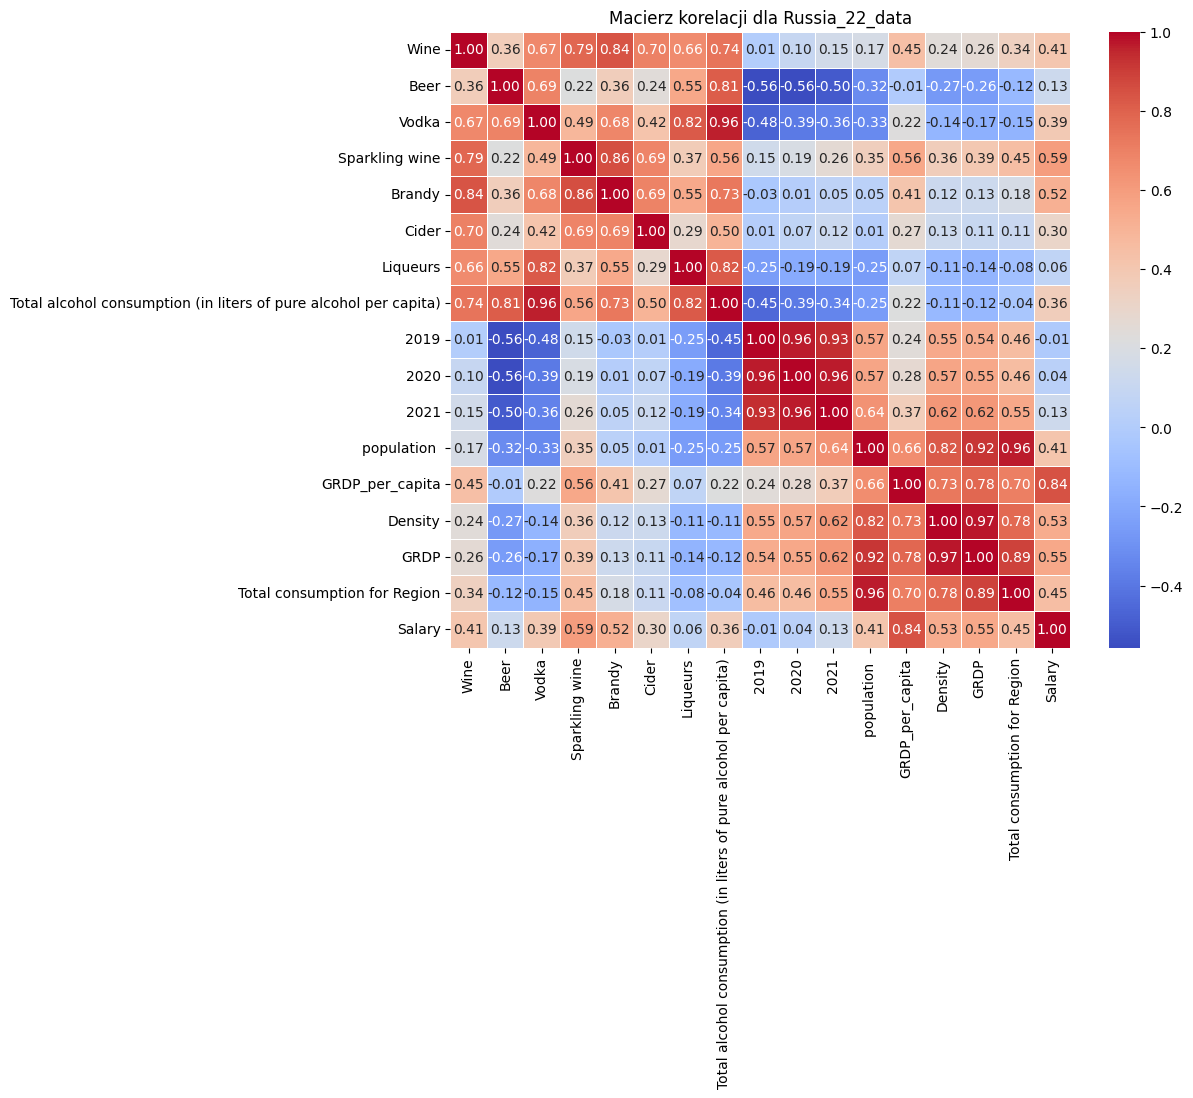

In [107]:

temp_data = Russia_22_data_updated.copy()

temp_data.drop(columns=['Year', 'males ', 'females '], inplace=True)
temp_data.dropna(inplace=True)

corr_matrix = temp_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Macierz korelacji dla Russia_22_data')
plt.show()


In [53]:
Russia_22_data.columns

Index(['Year', 'Wine', 'Beer', 'Vodka', 'Sparkling wine', 'Brandy', 'Сider',
       'Liqueurs',
       'Total alcohol consumption (in liters of pure alcohol per capita)',
       'males ', 'females ', '2019', '2020', '2021', 'population ',
       'GRDP_per_capita', 'Density', 'GRDP', 'Total consumption for Region'],
      dtype='object')